# Lab 9 - Linear Models - Part 1 - Solution

In [1]:
%matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

sns.set(style="whitegrid")

## Directions

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

<div style="background: mistyrose; color: firebrick; border: 2px solid darkred; padding: 5px; margin: 10px;">
Please follow the directions and make sure you provide the requested output. Failure to do so may result in a lower grade even if the code is correct or even 0 points.
</div>

### General Instructions

1.  You will be submitting your assignment to Canvas. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Canvas.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    * you don't need to submit course supplied data sets back.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

In [3]:
def freeman_diaconis(data):
    mn = data.min()
    mx = data.max()
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int(np.ceil((mx - mn)/h)), mn, mx

In [4]:
def histogram_w_whiskers(data, variable_name, zoom=None):
    k, mn, mx = freeman_diaconis(data[variable_name])
    bins = np.linspace(mn, mx, num=k)
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
        
    # start the plot: 2 rows, because we want the boxplot on the first row
    # and the hist on the second
    fig, ax = plt.subplots(
        2, figsize=(7, 5), sharex=True,
        gridspec_kw={"height_ratios": (.7, .3)}  # the boxplot gets 30% of the vertical space
    )

    # the histogram
    ax[0].hist(data[variable_name],bins=bins, color="dimgray", weights=empirical_weights)
    ax[0].set_title(f"{variable_name} distribution - Freeman Diaconis")
    ax[0].set_ylabel("Relative Frequency")
    if zoom:
        ax[0].set_ylim((0, zoom))
    # the box plot
    ax[1].boxplot(data[variable_name], vert=False)
    # removing borders
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].set_xlabel(variable_name)

    # and we are good to go
    plt.show()
    plt.close()

In [5]:
def histogram_trio(data, variable_name, zoom=1.0):
    k, mn, mx = freeman_diaconis(data[variable_name])
    bins = np.linspace(mn, mx, num=k) #[i for i in range( mn, mx, h)]    
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

    fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    fewer_bins = int(len(bins) * .50)
    more_bins = int(len(bins) * 2)

    n, bins, patches = ax[1].hist(data[variable_name], color="DimGray", bins=bins, weights=empirical_weights) # <---
    ax[1].set_xlabel(variable_name)
    ax[1].set_ylabel("Relative Frequency")
    ax[1].set_title(f"Relative Frequency Histogram of {variable_name}")
    ax[1].set_ylim((0, zoom))
    
    n, bins, patches = ax[0].hist(data[variable_name], color="DimGray", bins=fewer_bins, weights=empirical_weights)
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel("Relative Frequency")
    ax[0].set_title(f"Relative Frequency Histogram of {variable_name} (Fewer Bins)")
    
    n, bins, patches = ax[2].hist(data[variable_name], color="DimGray", bins=more_bins, weights=empirical_weights)
    ax[2].set_xlabel(variable_name)
    ax[2].set_ylabel("Relative Frequency")
    ax[2].set_title(f"Relative Frequency Histogram of {variable_name} (More Bins)")

    plt.show()
    plt.close()

In [6]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [7]:
from io import StringIO

## Data

The data is embedded here. No need to expand...

In [8]:
data = """\
x1	x2	y
42.53196404638552	0	39.266138333852396
37.01869338822434	0	35.38780631996972
48.3288342504206	0	46.26839427599523
43.01575004949211	1	44.16407081382897
49.82446398716534	1	48.14598000061575
53.05182703264607	0	50.10859905332506
50.577508493151335	1	48.72278380277136
48.66230915788665	1	46.86070060854518
59.200905062365756	1	54.54941811007832
46.899458063301296	1	46.45274210737207
49.53984298918534	0	47.311098766248165
56.20141058612436	0	55.009134373799384
46.191555580958024	0	44.694716359010805
51.070050720723486	1	49.76781032110353
41.665398630589856	0	38.56016900570599
47.254803561372825	1	47.48137185203709
37.63542814810546	1	41.28618234911959
51.47620027944755	1	50.453917889264424
41.60356365942902	0	38.56589893639894
53.077076349228655	1	49.84609972107021
52.49443318351219	1	50.070370688536016
53.51311419261094	1	51.4009809241463
45.92157212414309	0	46.4205775847286
43.90918076520862	0	44.06894418027712
50.28483454561473	0	48.307980376536335
47.77619925830439	0	47.52880364365444
46.05021820204064	0	45.266540282947766
54.74022798047512	1	49.5388424862949
54.175224214094904	1	49.5151845038181
33.519830644268666	0	33.14945320232296
51.609721790723185	1	47.56576269423462
49.557159460681596	1	47.33747984021572
59.517414435952645	1	51.63826903998511
39.77114946413516	1	42.0877068737684
57.19934899522586	1	52.077398785763805
49.69281617216099	0	45.833588129119434
53.524435708676414	1	50.068221941368854
50.61217550266046	1	49.50419159136896
53.306928185698126	1	50.75987607045231
43.03399419827299	1	43.9346784831377
43.802996624770685	0	42.61434651785355
51.088668626382216	1	48.40053169030099
44.037250800862424	1	44.15064915784359
55.72802275854175	1	49.8037233570838
49.922045123509555	0	47.58118334256501
50.40048098011718	1	47.28141145097148
48.02305990997677	1	46.10165485947634
51.64897886406086	1	50.287899466343205
45.928392403145025	1	46.52227443544181
47.7724354134946	1	47.51990418399228
47.80675744820208	1	46.73881915577311
47.35650622673358	1	47.72425745581924
47.907224460386324	0	45.73973335962161
45.98488666197187	0	44.801011100197364
56.41638750771391	0	55.414010391595944
50.86072750451391	1	50.572144262538714
48.12141659727555	1	49.3582794938027
55.43357474041848	1	51.613075364234994
51.276189055778445	0	49.966446887747175
41.5308310134472	1	43.341660654023244
53.81960283823004	1	48.997038217219924
51.73245886784904	1	49.68150480169435
38.67507301648082	0	38.48163914717438
52.011730639725364	1	49.79762678660579
53.79425640517957	1	49.80587872843501
47.46820398034373	1	46.005905956051826
42.680463453804926	0	41.757416757527515
47.014256759720936	1	46.336957889424994
53.354670848377815	0	50.45889702027998
49.58224911012258	1	49.0264643905292
38.88899948112294	0	38.464739223067646
56.510437687966835	1	50.93830097342925
50.81551035943704	1	48.920746514983676
53.64809210704751	1	49.623918929738046
47.11904227707985	0	46.27750579448739
44.34006262446135	0	42.05526135508424
51.42389910442588	1	49.54581162077361
49.318543069260116	1	47.10237118335985
53.973145024782724	0	52.29182487678392
45.95441290346115	1	48.074735130237976
53.52428517654122	1	51.16295120339898
46.62065003375652	0	43.30782980680714
44.53656539477583	1	45.01816474475141
41.15207097455226	1	43.89337064084363
49.310167483183044	0	47.131023812095286
39.037085956777666	1	43.96034732721155
46.25776087326585	1	44.75279018173252
49.39331705759021	0	48.52259266585329
57.526508530317884	0	55.46688196486551
51.61158177102028	0	50.17898869276044
49.90659353550422	0	49.07749388172434
42.565669815616296	0	41.705411553444804
41.7964545880127	0	40.31781981336837
51.57540430152188	1	47.44725959006256
53.55247006558779	1	49.39702148958889
50.996058211211285	1	47.968246879234464
50.50179328654236	1	50.10922919554442
42.148448659918785	0	40.96678336225678
42.739255010603884	0	43.13838331089848
49.21589828426975	1	47.41880947445886
"""

In [9]:
df = pd.read_table(StringIO(data))

In [10]:
df.head()

,x1,x2,y
0,42.531964,0,39.266138
1,37.018693,0,35.387806
2,48.328834,0,46.268394
3,43.015750,1,44.164071
4,49.824464,1,48.145980


## Simple Linear Regression

Sam is working on a project to predict a target variable $y$ using two features $x_1$ and $x_2$.
$x_1$ is numerical.
$x_2$ is categorical (binary) with outcomes 0 and 1.
Based on domain knowledge, Sam has concluded that $x_1 - (+) \longrightarrow y$ and $x_2 - (+) \longrightarrow y$.
$x_2$ also influences $x_1$, $x_2 - (-) \longrightarrow x_1$.

Here is a reproduction of her EDA:

### Single Variable EDA

#### $y$

The target variable is $y$.
It's a numerical variable.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This is synthetic data so there's no actual domain knowledge or hypothesis to make. Those would go here if it were real data, right?</p>
</div>

Here are the descriptive statistics:

In [11]:
df.y.describe()

count    100.000000
mean      46.990968
std        4.129255
min       33.149453
25%       44.738272
50%       47.524354
75%       49.799151
max       55.466882
Name: y, dtype: float64

The mean is about 47 with a standard deviation of 4.13.
The median is 47.5.
The difference between Q2 and Q1 is 47.5 - 44.7 $\approx$ 3.
The difference between Q3 and Q2 is 49.8 - 47.5 $\approx$ 2.5.
This suggests a slight skew.

The difference between the min and Q1 is nearly 11, while the difference between the max and Q3 is less than 6.
This suggests a larger skew.

Here is the histogram:

Freeman Diaconis for y: 11 bins


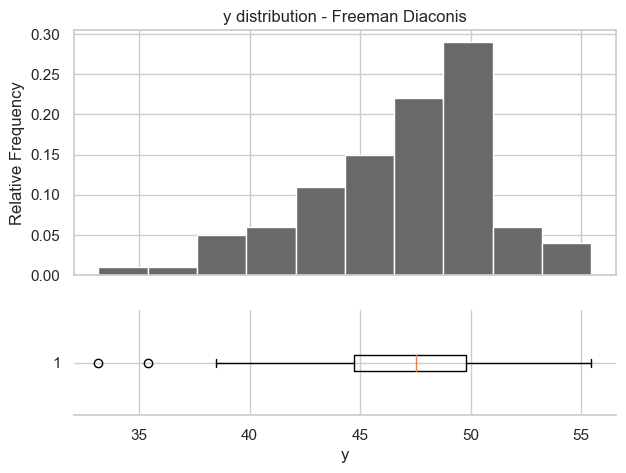

In [12]:
histogram_w_whiskers(df, "y", zoom=None)

While the coincidence of the mean and median suggest symmetry, the distribution is very skewed right.

Here is a set of histograms with fewer and more bins:

Freeman Diaconis for y: 11 bins


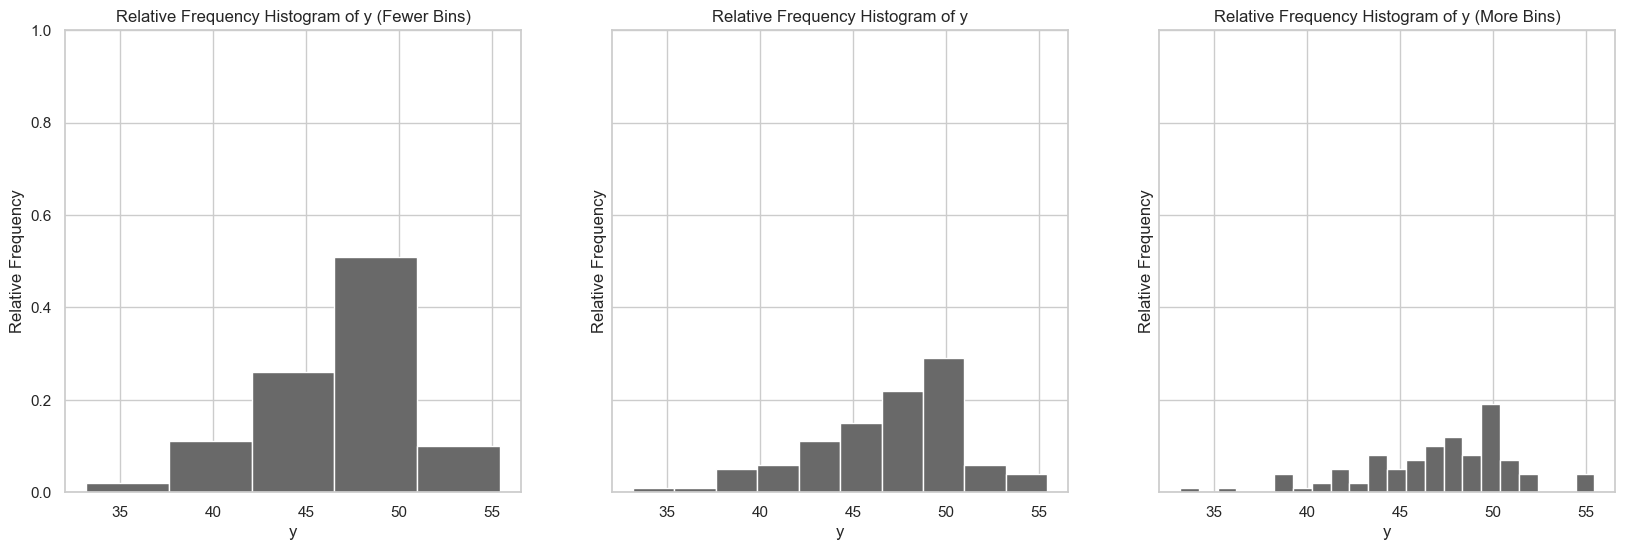

In [13]:
histogram_trio(df, "y", zoom=1.0)

While the overall pattern persists in the histogram with fewer bins,
The histogram with more bins shows that there might be some finer detail in the data.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Don't forget your questions and notes when working with real data.</p>
</div>

Here are the descriptive statistics:

#### $x_1$

$x_1$ is a numerical variable.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This is synthetic data so there's no actual domain knowledge or hypothesis to make. Those would go here if it were real data, right?</p>
</div>

Here are the descriptive statistics:

In [14]:
df.x1.describe()

count    100.000000
mean      48.621770
std        5.203988
min       33.519831
25%       45.926687
50%       49.466580
75%       51.802277
max       59.517414
Name: x1, dtype: float64

The mean is 48.6 with a standard deviation of 5.2.
The median is 49.5, which suggests a slight skew.
The difference between Q2 and Q1 is 49.5 - 46 $\approx$ 3.5.
The difference between Q3 and Q2 is 51.8 - 49.5 $\approx$ 2.3.
This suggests a skew as well.

Looking at the min and max, the min and Q1 are 12.4 units apart while the max and Q3 are 7.7 units apart.
This suggests a skew right as well.
This makes sense if we believe that $x_1$ and $y$ are related.

Here is the histogram:

Freeman Diaconis for x1: 11 bins


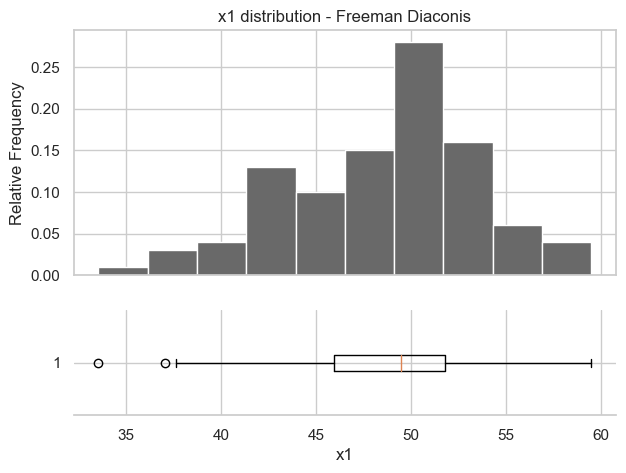

In [15]:
histogram_w_whiskers(df, "x1", zoom=None)

$x_1$ itself appears to be multi-modal with a peak around 43 and 50.
It's interesting that this same peak doesn't appear in $y$.
$x_1$, like $y$, is skewed right but there is something else going on.

Here are histograms with fewer and more bins:

Freeman Diaconis for x1: 11 bins


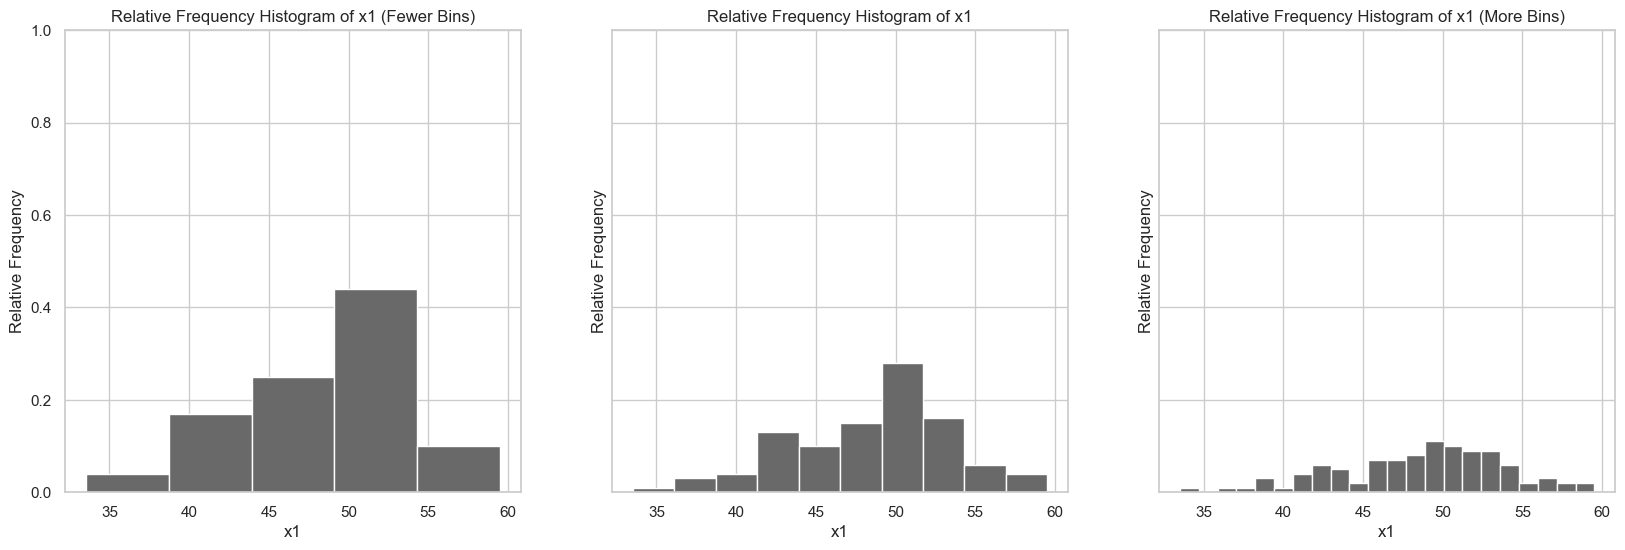

In [16]:
histogram_trio(df, "x1", zoom=1.0)

$y$ and $x_1$ have much more similar histograms with fewer bins than with the "optimal" number.
With more bins, we can see more detail in $x_1$.
This detail might explain the similar patterns in $y$.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Don't forget your questions and notes when working with real data.</p>
</div>

#### $x_2$

$x_2$ is a categorical variable with values 0 and 1.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This is synthetic data so there's no actual domain knowledge or hypothesis to make. Those would go here if it were real data, right?</p>
</div>

Here are the descriptive statistics:

In [17]:
df.x2.value_counts()

1    61
0    39
Name: x2, dtype: int64

Two thirds of the data have $x_2$, whereas the other third does not.
It's possible that $x_2$ explains the different patterns in both $y$ and $x_1$ as we know that $x_2$ influences both variables.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Don't forget your questions and notes when working with real data.</p>
</div>

## Pairwise EDA

### $y$ v. $x_1$

We know from our domain knowledge that $x_1 - (+) \longrightarrow y$.
Let's see how strong that relationship is, based on correlation coefficients:

In [18]:
print("r   = ", stats.pearsonr(df.y, df.x1)[0])
print("rho = ", stats.spearmanr(df.y, df.x1)[0])

r   =  0.9319890664545462
rho =  0.9339573957395738


Both Pearson's correlation coefficient, $r$ = 0.93, and Spearman's, $\rho$ = 0.933, show a very strong correlation between $y$ and $x_1$.

Here is a scatter plot:

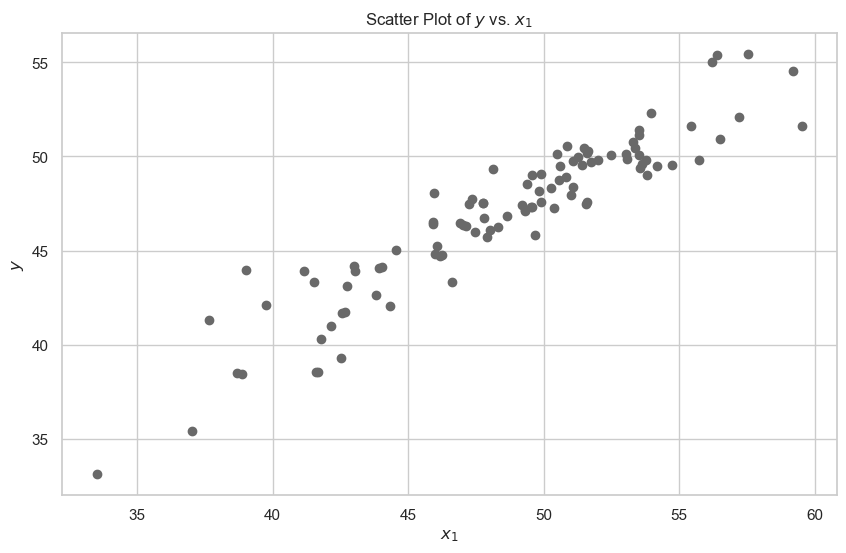

In [19]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(df.x1, df.y, marker="o", color="dimgray")

axes.set_ylabel("$y$")
axes.set_xlabel("$x_1$")
axes.set_title("Scatter Plot of $y$ vs. $x_1$")

plt.show()
plt.close()

Although the plot shows an overall linear relationship between the variables, the relationship gets less tight at low and high values of $x_1$.

#### $y$ v. $x_2$

Based on domain knowledge, we believe that $x_2 - (+) \longrightarrow y$.
Therefore, we expect the mean of $y$ to be higher for $x_2=1$ than $x_2=0$.

In [20]:
describe_by_category(df, "y", "x2", transpose=True)

x2             0          1
count  39.000000  61.000000
mean   45.165771  48.157898
std     5.286994   2.623129
min    33.149453  41.286182
25%    41.731414  46.738819
50%    45.739733  48.722784
75%    48.415287  49.805879
max    55.466882  54.549418


The descriptive statistics show that the mean of $y$ where $x_2=1$ is 48.2 as compared to $x_2=0$, where the mean is 45.2, about three units less.

Here are histograms for $y$ for the different values of $x_2$:

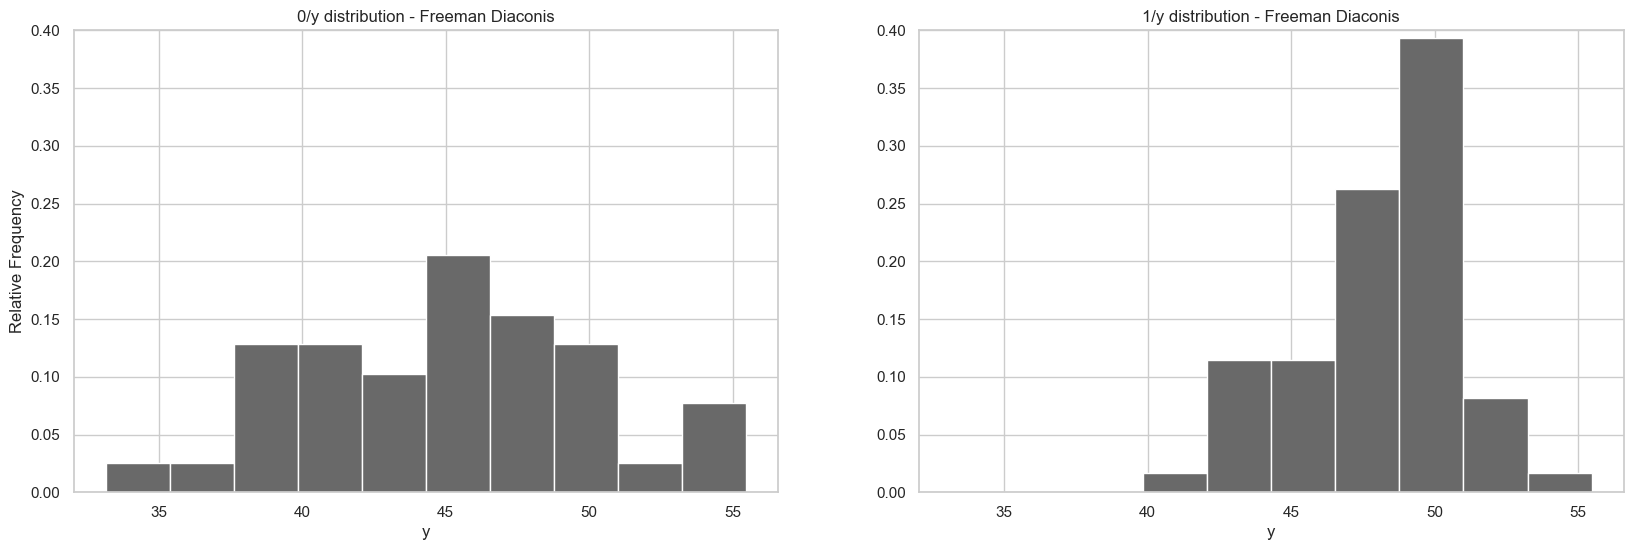

In [21]:
k, mn, mx = freeman_diaconis(df.y)
bins = np.linspace(mn, mx, num=k)

grouped = df.groupby("x2")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

observations = len(grouped["y"].get_group(0))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes.hist(grouped["y"].get_group(0),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("0/y distribution - Freeman Diaconis")
axes.set_xlabel("y")
axes.set_ylim((0,0.4))
axes.set_ylabel("Relative Frequency")

observations = len(grouped["y"].get_group(1))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["y"].get_group(1),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("1/y distribution - Freeman Diaconis")
axes.set_xlabel("y")
axes.set_ylim((0,0.4))

plt.show()
plt.close()

There's an interesting pattern here.
When $x_2$=0, the variability of $y$ is much higher than if $x_2$=1.

#### $x_1$ v. $x_2$

Our domain knowledge also suggests that $x_1$ and $x_2$ are negatively related, $x_2 - (-) \longrightarrow x_1$.
This could have ramifications for any modeling choices we make later, depending on the model.

Here are the descriptive statistics by value of $x_2$:

In [22]:
describe_by_category(df, "x1", "x2", transpose=True)

x2             0          1
count  39.000000  61.000000
mean   46.698656  49.851302
std     5.461209   4.674884
min    33.519831  37.635428
25%    42.623067  47.356506
50%    46.620650  50.612176
75%    49.914319  53.306928
max    57.526509  59.517414


The results suggest our domain knowledge might be wrong or improperly specified.
When $x_2$ = 1, the mean of $x_1$ is higher (49.9) than when $x_2$=0, (46.7).
We can also see that the variability of $x_1$ is larger when $x_2$=1 (5.5 v. 4.7).

Here are the histograms by value of $x_2$:

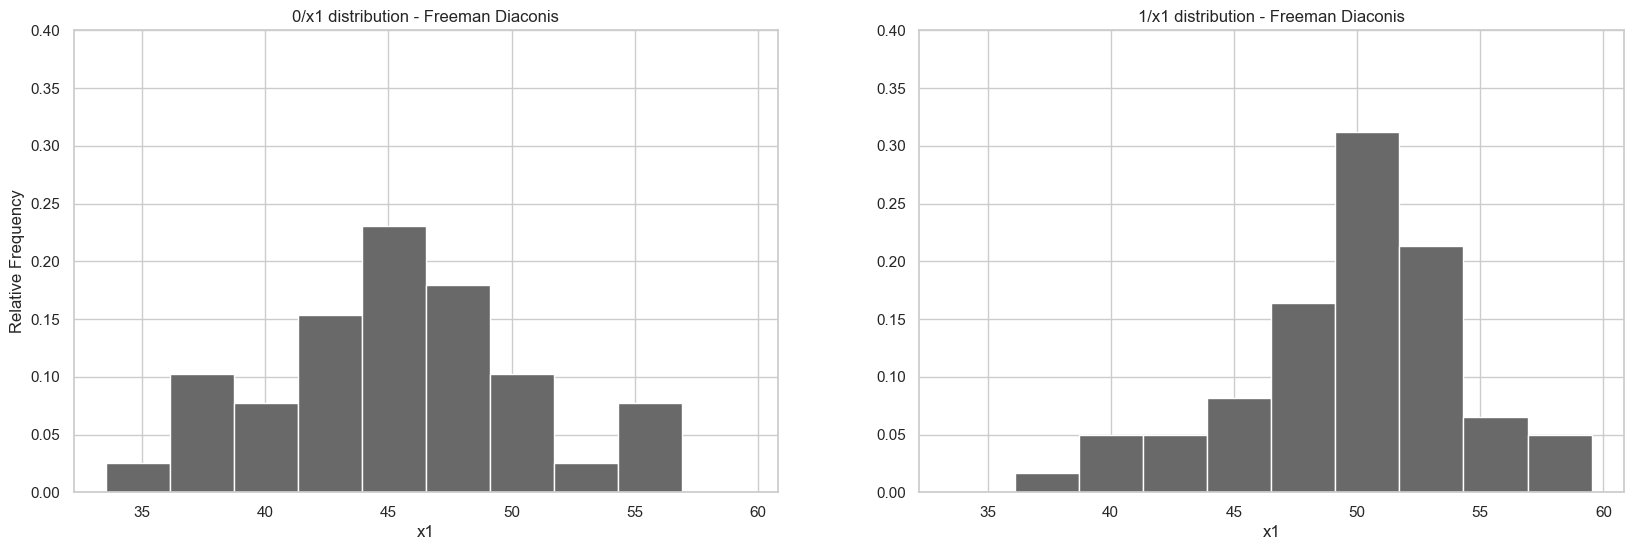

In [23]:
k, mn, mx = freeman_diaconis(df.x1)
bins = np.linspace(mn, mx, num=k)

grouped = df.groupby("x2")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

observations = len(grouped["x1"].get_group(0))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes.hist(grouped["y"].get_group(0),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("0/x1 distribution - Freeman Diaconis")
axes.set_xlabel("x1")
axes.set_ylim((0,0.4))
axes.set_ylabel("Relative Frequency")

observations = len(grouped["x1"].get_group(1))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["x1"].get_group(1),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("1/x1 distribution - Freeman Diaconis")
axes.set_xlabel("x1")
axes.set_ylim((0,0.4))

plt.show()
plt.close()

We see the same pattern for $x_1$, given $x_2$, that we saw for $y$.
When $x_2$ is 0, the variability of $x_1$ is larger than when when $x_2$ is 1.
We can also see that the histogram has a higher peak when $x_2$ is 1.
This could be an explanation for the patterns we saw in the detailed histograms for $y$ and $x_1$.

After conducting her EDA, she decided to create a Baseline or Null model for $y$.
Based on the use case, she noted that over estimates and under estimates should be treated the same and large errors should be penalized more than small errors.

**1. What function did she use to measure loss?**

She used Mean Squared Error (MSE). MSE treats overestimates and underestimates the same and the squaring of the error penalizes larger errors more than smaller errors (ie, 1^2 = 1 but 2^2 = 4).

**2. What constant/estimator minimizes that loss function?**

MSE is minimized by the mean.

**3. Re-create her Baseline model, along with predictive/error bounds**

Based on #1 and #2, we can calculate the arithmetic mean of $y$ as our Baseline model.
Because the data is largely symmetric, we can calculate error bounds using standard normal distribution:

In [24]:
mean = df.y.mean()
std = df.y.std()

In [25]:
print(mean, std, mean-1.96*std, mean+1.96*std)

46.99096845797806 4.129254548849204 38.897629542233624 55.0843073737225


The Baseline model predicts a value of 46.99 for $y$.
The standard deviation of $y$ (basically RMSE in this context) is 4.13.
The 95% predictive error bounds are 95% error bounds of 38.9 to 55.1.

In [26]:
import models

**4. Model 1**

Now you are going to help her build a linear regression for $y$.

Build the model "y ~ x1" including credible intervals.
Interpret all parameters including $\sigma$ and $R^2$, where appropriate compare and contrast with the Null model.
What interpretation of the coefficients did you use?



<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Our error tolerance has not changed.
Because ordinary least squares minimizes mean squared error, we can just continue the discussion without rehashing our expectations.
However, if we were to change the type of model, to one that does not directly minimize MSE, we would need to address that.</p>
    <p>For example, if we switched to k-Nearest Neighbors regression, it does not directly minimize MSE. We could still use MSE as an evaluation metric (more about that in Module 11) but we would need to discuss what the loss function of k-Nearest Neighbors regression is and whether and how it's acceptable.</p>
</div>


In [27]:
model_1 = models.bootstrap_linear_regression("y ~ x1", df)
models.describe_bootstrap_lr(model_1)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,11.03,7.48,14.27
x1,$\beta_{1}$,0.74,0.67,0.81
,,,,
Metrics</strong,Mean</strong,Lo</strong,Hi</strong,
$\sigma$,1.50,1.28,1.70,
$R^2$,0.87,0.83,0.91,


The Error of the Regression ($\sigma$) is 1.5, down from the Null model's 4.13.
The Coefficient of Determination ($R^2$) is 0.87, which indicates that 87% of the variation in $y$ is explained by the model.

The intercept is estimated to be 11.03. There is a 95% probability, given the data and the prior, that the intercept is between 7.07 and 14.64.
The $\beta_1$ is estimated to be 0.74. There is a 95% probability, given the data and the prior, that $\beta_1$ is between 0.67 and 0.82.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>We'll have more to say about credible intervals and coefficients in Module 10.</p>
</div>

There are two possible (at least) interpretations of our model:

1. Causal - if we increase $x_1$ by 1, it increases $y$ by 0.74.
2. Predictive - the expected difference in $y$ among those observations with an $x_1$ of 48.6 versus a value of 49.6 is predicted to be 0.74.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>You didn't need to do both but the one you did needed to be right. For the predictive interpretation, I picked the mean of x1. You may have picked a different value but the difference needs to be one.</p>
</div>

**5. Write out the regression equation**

$\hat{y} = 11.03 + 0.74 \times x_1$

**6. Plot y v. x1 and the linear regression line**

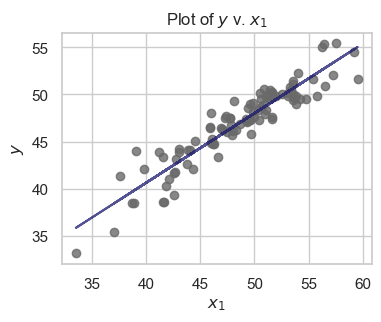

In [28]:
beta = model_1["coefficients"]

figure = plt.figure(figsize=(4,3))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(df.x1, df.y, color="dimgray", alpha=0.8)

axes.plot(df.x1, [beta[ 0] + beta[ 1] * x for x in df.x1], '-', color="midnightblue", alpha=0.75)

axes.set_ylabel(r"$y$")
axes.set_xlabel(r"$x_1$")
axes.set_title(r"Plot of $y$ v. $x_1$")

plt.show()
plt.close();

**7. Model 2**

Build the model "y ~ x1 + x2 + x1:x2" including credible intervals. 
Interpret all parameters including $\sigma$ and $R^2$, where appropriate compare and contrast with the Null model.
What interpretation of the coefficients did you use?

In [29]:
model_2 = models.bootstrap_linear_regression("y ~ x1 + x2 + x1:x2", df)
models.describe_bootstrap_lr(model_2)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,0.84,-1.96,3.23
x1,$\beta_{1}$,0.95,0.90,1.00
x2,$\beta_{2}$,21.38,17.74,25.61
x1:x2,$\beta_{3}$,-0.43,-0.52,-0.35
,,,,
Metrics</strong,Mean</strong,Lo</strong,Hi</strong,
$\sigma$,1.01,0.89,1.10,
$R^2$,0.94,0.91,0.96,


The Error of the Regression ($\sigma$) is 1.01, down from the Null model's 4.13 and Model 1's 1.5.
The Coefficient of Determination ($R^2$) is 0.94, which indicates that 94% of the variation in $y$ is explained by the model.

The intercept is estimated to be 0.84. There is a 95% probability, given the data and the prior, that the intercept is between -1.97 and 3.57. We don't worry much if the intercept's credible interval contains zero.

The $\beta_1$ ($x_1$'s effect) is estimated to be 0.95. There is a 95% probability, given the data and the prior, that $\beta_1$ is between 0.89 and 1.01.
The $\beta_2$ ($x_2$'s effect) is estimated to be  21.38, with a 95% probability range of 17.05 and 25.24, given the data and the prior.
The interaction term, $\beta_3$ is negative, with a value of -0.43. The 95% credible range is -0.51 to -0.35, given the data and the prior.

There are two possible (at least) interpretations of our model:

1. Causal
    1. if we increase $x_1$ by 1, it increases $y$ by 0.95.
    2. if we change to $x_2=1$, $y$ is increased by 21.38.
    3. if we increase $x_1$ by 1 and the observation is in the group $x_2=1$, $y$ is decreased an additional 0.43, when $x_1$ is increased by 1.
    
2. Predictive
    1. the expected difference in $y$ among those observations with an $x_1$ of 48.6 versus a value of 49.6 is predicted to be 0.95.
    2. the expected difference in $y$ for those in the group $x_2=1$ is 21.38 higher than those in the group $x_2=0$.
    3. the expected difference in $y$ among those $x_1$ with a value of 48.6 and a value of 49.6 is predicted to be -0.43 less than it otherwise would be, for those in the group $x_2=1$.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>You didn't need to do both but the one you did needed to be right. For the predictive interpretation, I picked the mean of x1. You may have picked a different value but the difference needs to be one.</p>
</div>

**8. Write out the regression equations**

$\hat{y}_{x_2=0} = 0.84 + 0.95 \times x_1$

$\hat{y}_{x_2=1} = (0.84 + 21.38) + (0.95 - 0.43) \times x_1 = 22.22 + 0.52 \times x_1$

**9. Plot y v. x1, x2 and the regression lines**

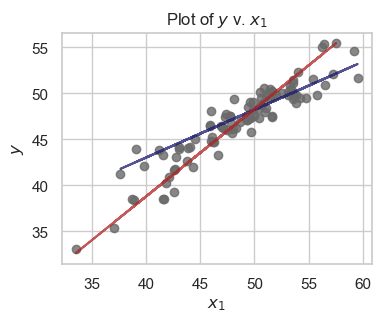

In [30]:
beta = model_2["coefficients"]
figure = plt.figure(figsize=(4,3))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(df.x1, df.y, color="dimgray", alpha=0.8)


xs = list(zip(df.x1, df.x2))
axes.plot([x1 for x1, x2 in xs if x2 == 1], [(beta[0] + beta[2]) + (beta[1] + beta[3]) * x1 for x1, x2 in xs if x2 == 1], '-', color="midnightblue", alpha=0.75)
axes.plot([x1 for x1, x2 in xs if x2 == 0], [beta[0] + beta[1] * x1 for x1, x2 in xs if x2 == 0], '-', color="firebrick", alpha=0.75)

axes.set_ylabel(r"$y$")
axes.set_xlabel(r"$x_1$")
axes.set_title(r"Plot of $y$ v. $x_1$")

plt.show()
plt.close();

### Side Quest

**10. Model 3**

Sam is interested in the relationship between $y$ and $x_2$.
Build the model "y ~ x2" including credible intervals, interpret all parameters including $\sigma$ and $R^2$, where appropriate compare and contrast with the EDA on $y$ v. $x_2$.
How are the estimated parameters related to the descriptive statistics?

In [31]:
model_3 = models.bootstrap_linear_regression("y ~ x2", df)
models.describe_bootstrap_lr(model_3)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,45.17,43.54,47.00
x2,$\beta_{1}$,2.99,1.12,4.57
,,,,
Metrics</strong,Mean</strong,Lo</strong,Hi</strong,
$\sigma$,3.88,3.19,4.43,
$R^2$,0.13,0.01,0.26,


**11. Non-Parametric Bootstrap**

Estimate the posterior distribution of $y$ for the groups $x_2=0$ and $x_2=1$ as we did in Module 7.
Estimate the 95% credible interval for the difference.
Compare and constrast your results to Model 3 and Model 2.

In [32]:
def bootstrap_sample( data, f, n=100):
    result = []
    m = len( data)
    for _ in range( n):
        sample = np.random.choice( data, len(data), replace=True)
        r = f( sample)
        result.append( r)
    return np.array( result)

In [33]:
posterior_x2_0 = bootstrap_sample(df[df.x2 == 0].y, np.mean, 1_000)
posterior_x2_1 = bootstrap_sample(df[df.x2 == 1].y, np.mean, 1_000)
difference = posterior_x2_1 - posterior_x2_0

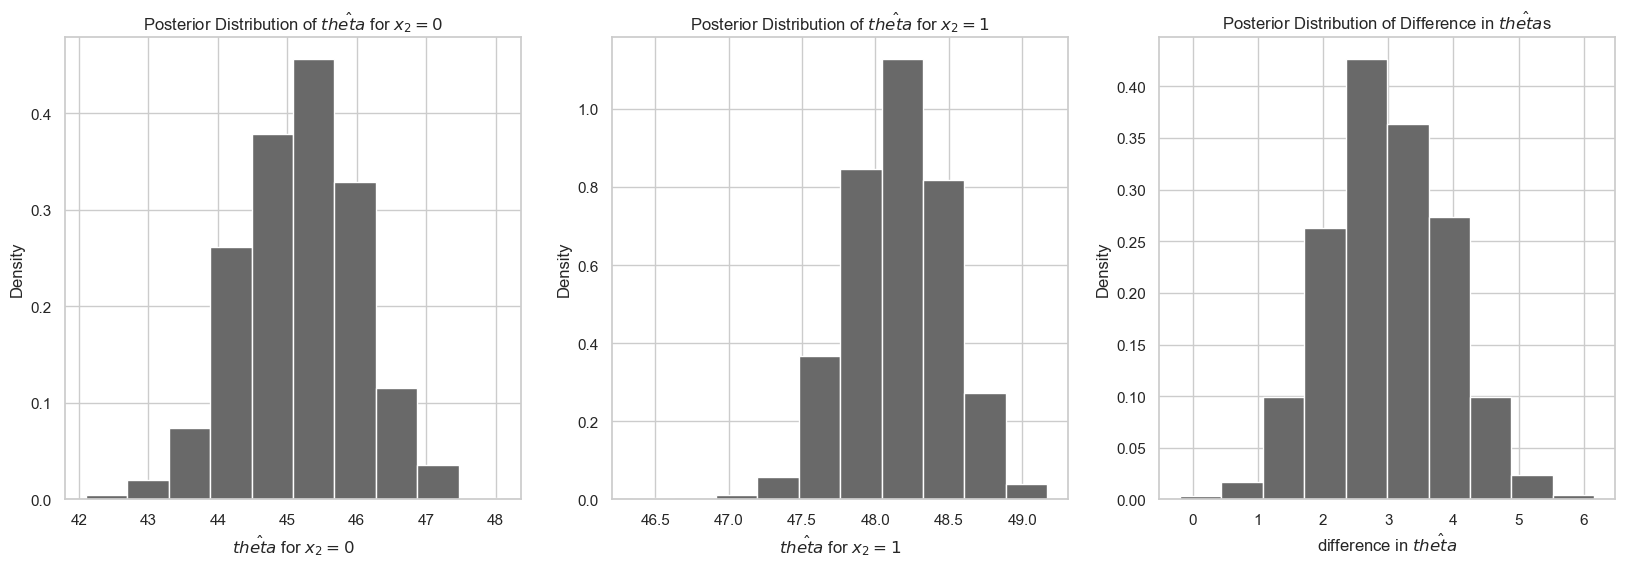

In [34]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)

axes.hist( posterior_x2_0, density=True, color="dimgray")
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$ for $x_2=0$")
axes.set_title( "Posterior Distribution of $\hat{theta}$ for $x_2=0$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( posterior_x2_1, density=True, color="dimgray")
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$ for $x_2=1$")
axes.set_title( "Posterior Distribution of $\hat{theta}$ for $x_2=1$")
axes = figure.add_subplot(1, 3, 3)

axes.hist( difference, density=True, color="dimgray")
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

In [35]:
print( "95% BCI for x2=0's theta:", stats.mstats.mquantiles( posterior_x2_0, [0.0275, 0.9725]))
print( "95% BCI for x2=1's theta:", stats.mstats.mquantiles( posterior_x2_1, [0.0275, 0.9725]))
print( "95% BCI for difference:", stats.mstats.mquantiles( difference, [0.0275, 0.9725]))

95% BCI for x2=0's theta: [43.54340158 46.77631472]
95% BCI for x2=1's theta: [47.5300512  48.76918382]
95% BCI for difference: [1.35586109 4.69899583]


We can reproduce the EDA for $x_1$ v. $x_2$:

In [36]:
describe_by_category(df, "x1", "x2", transpose=True)

x2             0          1
count  39.000000  61.000000
mean   46.698656  49.851302
std     5.461209   4.674884
min    33.519831  37.635428
25%    42.623067  47.356506
50%    46.620650  50.612176
75%    49.914319  53.306928
max    57.526509  59.517414


The difference is 49.85 - 46.69 = 3.16.
This is fairly close to the difference calculated in the linear regression model.
The coefficient on $x_2$ is 2.99.

If we look at the mean of the posterior for the difference, we have:

In [37]:
np.mean(difference)

2.983138837848628

but this may indicate we just need more bootstrap samples.

The 95% credible interval from the Model 3 linear regression is (1.19, 4.76).
The 95% credible interval from the direct statistical inference (non-parametric bootstrap) is (1.40, 4.71).
These are nearly identical.

This demonstrates the broad equivalence of the two techniques, although we rarely do statistical inference this way (we don't generally run an A/B test and then use linear regression to determine of the results are believable).
However, it points to some interesting relationships between statistical inference, linear regression, and other techniques such as ANOVA.
What would happen if your linear regression consisted of 5 categorical variables?

If we look back to Model 2, however, we do get a different story and we have to be a bit careful:

In [38]:
models.describe_bootstrap_lr(model_2)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,0.84,-1.96,3.23
x1,$\beta_{1}$,0.95,0.90,1.00
x2,$\beta_{2}$,21.38,17.74,25.61
x1:x2,$\beta_{3}$,-0.43,-0.52,-0.35
,,,,
Metrics</strong,Mean</strong,Lo</strong,Hi</strong,
$\sigma$,1.01,0.89,1.10,
$R^2$,0.94,0.91,0.96,


We cannot simply interpret the coefficient on $x_2$ as simply as we did before because now our model is taking $x_1$ into account, whereas our simple statistical inference did not.
With Model 2, we're saying that the difference in $y$ between $x_2=0$ and $x_2=1$ is 21.38, but this is in the context of $x_1$.

Let's evaluate the regression at the mean value of $x_1$, 48.6:

In [39]:
y_est_x2_0 = 0.84 + 0.95*48.6
y_est_x2_1 = 0.84 + 0.95*48.6 + 21.38*1 -0.43*48.6*1

In [40]:
print(y_est_x2_0)
print(y_est_x2_1)
y_est_x2_1 - y_est_x2_0

47.010000000000005
47.492000000000004


0.4819999999999993

So the difference depends on $x_1$ as well.

Why use linear regression instead of simple statistical inference?
If you can't control for all the other effects.
In this case, $x_1$ would have been a *confounder*.

## Main Campaign

**12. Prediction**

Returning to Model 3, let us make some predictions using the Bootstrap.
We'll start by identifying two observations, one with $x_2=0$ and one with $x_2=1$.
We have to calculate each individual feature ourselves:

In [41]:
obs1 = [1, 48.6, 0, 0]
obs2 = [1, 48.6, 1, 48.6]

Before we start with estimating error bounds, let's make simple predictions, just to see if we have it about right:

In [42]:
pred1 = model_2["model"].predict([obs1])[0][0]
pred1

46.970646927157524

In [43]:
pred2 = model_2["model"].predict([obs2])[0][0]
pred2

47.506676521698836

Now let's use the Bootstrap to calculate predictions with error bounds:

In [44]:
import random

In [45]:
def bootstrap_prediction(df, model, obs, samples=1000):
    predictions = []
    for i in range(samples):
        bootstrap = df.sample(len(df), replace=True)
        result = models.linear_regression(model, bootstrap)
        predict = result["model"].predict([obs])[0][0]
        error = random.choice(result["residuals"])[0]
        estimate = predict + error
        predictions.append(estimate)
    return predictions

In [46]:
error1 = bootstrap_prediction(df, "y ~ x1 + x2 + x1:x2", obs1)

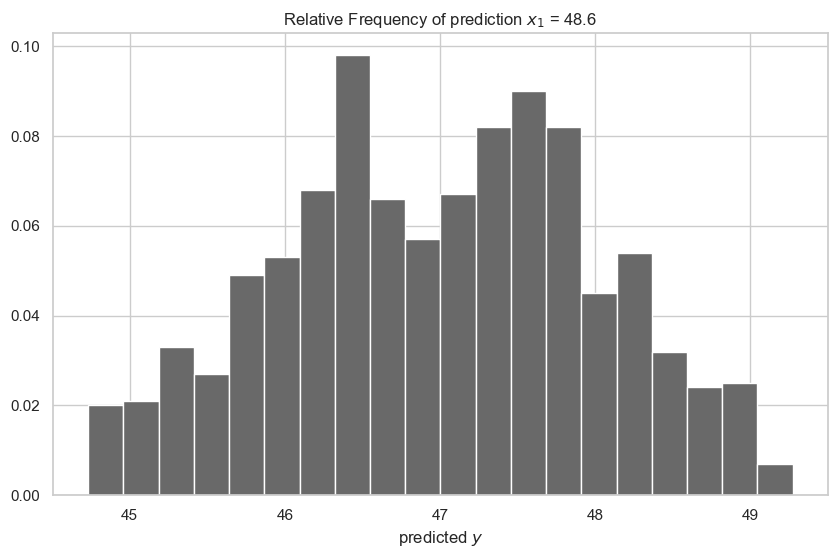

In [47]:
figure = plt.figure(figsize=(10, 6))

_weights = np.ones(len(error1))/len(error1)
axes = figure.add_subplot(1, 1, 1)
axes.hist(error1,bins=20, weights=_weights, color="dimgray")
axes.set_title("Relative Frequency of prediction $x_1$ = 48.6")
axes.set_xlabel("predicted $y$")

plt.show()
plt.close()

Because we're using actual residuals, we're limited in our approximation of the error distribution.
We should check to see if more samples will smooth the estimation out:

In [48]:
error1 = bootstrap_prediction(df, "y ~ x1 + x2 + x1:x2", obs1, samples=10_000)

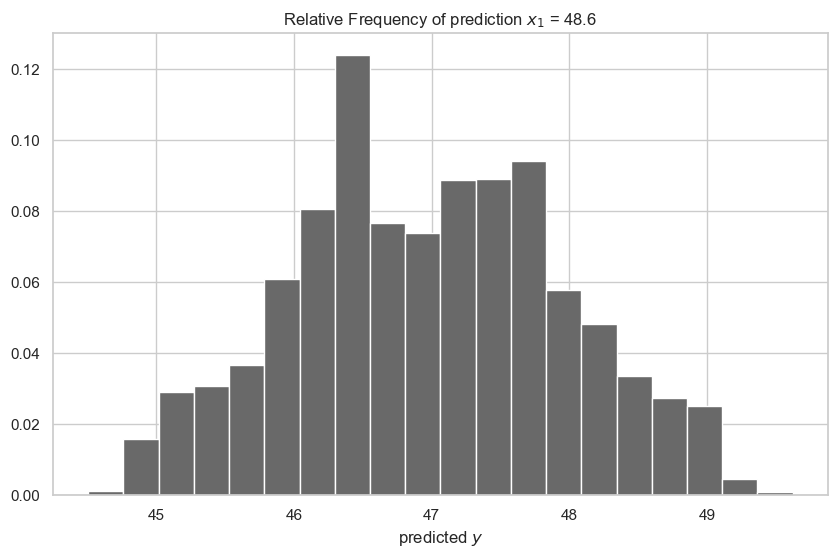

In [49]:
figure = plt.figure(figsize=(10, 6))

_weights = np.ones(len(error1))/len(error1)
axes = figure.add_subplot(1, 1, 1)
axes.hist(error1,bins=20, weights=_weights, color="dimgray")
axes.set_title("Relative Frequency of prediction $x_1$ = 48.6")
axes.set_xlabel("predicted $y$")

plt.show()
plt.close()

Our estimated 95% error bounds are:

In [50]:
print("Prediction: ", pred1)
print("95% error bounds:", stats.mstats.mquantiles(error1, [0.0275, 0.9725]))

Prediction:  46.970646927157524
95% error bounds: [45.15162426 48.88499854]


We make a prediction of 46.97, we're going to see values in the range of 45.13 to 48.86, 95% of the time.

It seems like, at least theoretically, we should be able to use the same bootstrap samples for the new estimate.
That is, we estimated 10,000 models and saved them and their residuals off.
We should be able to re-use those models and residuals for another prediction.
While this is logically true, we're going to forgo the caching optimization for now:

In [51]:
error2 = bootstrap_prediction(df, "y ~ x1 + x2 + x1:x2", obs2, samples=10_000)

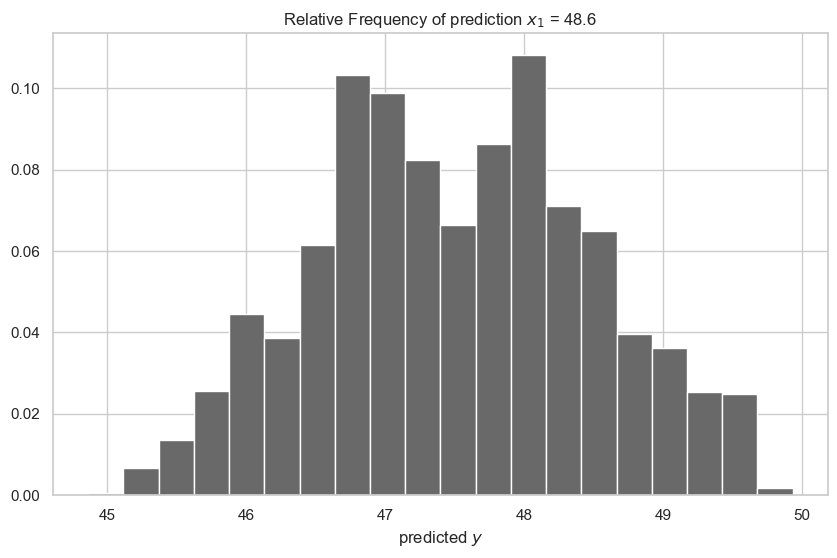

In [52]:
figure = plt.figure(figsize=(10, 6))

_weights = np.ones(len(error2))/len(error2)
axes = figure.add_subplot(1, 1, 1)
axes.hist(error2,bins=20, weights=_weights, color="dimgray")
axes.set_title("Relative Frequency of prediction $x_1$ = 48.6")
axes.set_xlabel("predicted $y$")

plt.show()
plt.close()

In [53]:
print("Prediction: ", pred2)
print( "95% error bounds:", stats.mstats.mquantiles(error2, [0.0275, 0.9725]))

Prediction:  47.506676521698836
95% error bounds: [45.71302095 49.42096221]



<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Reflection</strong>
    <p>This assignment used synthetic data so that we could concentrate on simple problems of one or two variables.</p>
    <p>I hope it made you think about how important domain knowledge really is and how it fundamentally guides the modeling process and the interpretation of the results.</p>
</div>